# Data Science Summer 2022 Challenge

## Question 1

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#load the data
df = pd.read_csv('data.csv')

In [4]:
#checking if the data in the question matches up with the data in the spreadsheet
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
#checking if the data in the question matches up with the data in the spreadsheet
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [6]:
#checking if the data in the question matches up with the data in the spreadsheet
df.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


Since we have a high AOV, we should check the standard deviation of our data set to see how spread (far) 
our data is from the mean. If the standard deviation is really high, there may exist outliers that we should take into account. I chose to filter our data based on the 'order_amount' column since we are looking at average order 
value - we can get a better sense of how prices vary from the mean.

In [7]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

It appears that AOV is calculated by average the order_amount data (also shown above)

In [8]:
df['order_amount'].mean()

3145.128

We will now plot order_amount using a histogram. The x-axis represents the order_amount and the y-axis represents the number of orders. Notice that there is an outlier around order amounts of 600, 000 and 700, 000. Let's analyze that outlier.

<AxesSubplot:>

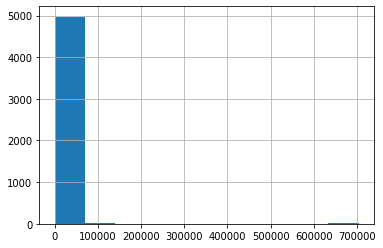

In [9]:
df['order_amount'].hist()

In [10]:
#we want to filter table to get more information about the outliers
df[df['order_amount'] > 600000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


As you can see, there are many orders that have an order amount of 704, 000 which is significantly higher than most of the order amounts. Based on the histogram, most of the orders are within values of 0 - 100, 000. Simply taking the average of all the orders would not be very representative of the dataset since there could be outliers where costs are either extremely high or extremeley low. A better metric to use would be the median of the AOVs of all the shops since the median is less impacted by outliers.

### b) What metric would you report for this dataset?

The metric I would use for this data set is the median. I would take the median of all the AOVs of every individual shop. I calculated each shop's AOV by summing their total revenue and dividing by total number of orders.


In [11]:
revenue = df.groupby(['shop_id'])['order_amount'].agg('sum')
revenue.name = 'total_revenue'
orders = df.groupby(['shop_id'])['total_items'].agg('sum')
orders.name = 'total_orders'
new_df = pd.concat([revenue, orders], axis=1)
aov = new_df['total_revenue']/new_df['total_orders'] 
aov.name = 'aov'
new_df = pd.concat([revenue, orders , aov], axis=1)
new_df

,total_revenue,total_orders,aov
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


In [12]:
median = new_df['aov'].median()

### c) What is its value?



In [13]:
print("median:", median)

median: 153.0


## Question 2

### a) How many orders were shipped by Speedy Express in total?


54 orders were shipped by Speedy Express

SELECT COUNT(ShipperID)
FROM Orders
WHERE ShipperID == (SELECT ShipperID FROM Shippers WHERE ShipperName == 'Speedy Express')

### b) What is the last name of the employee with the most orders?


The last name is Peacock

SELECT Orders.EmployeeID, Employees.LastName
FROM (Orders 
INNER JOIN Employees 
ON Orders.EmployeeID = Employees.EmployeeID)
GROUP BY LastName
ORDER BY COUNT(LastName)DESC
LIMIT 1;

### c) What product was ordered the most by customers in Germany?

Boston crab meat was the msot ordered with 160 orders

SELECT p.ProductName, SUM(Quantity) AS TotalQuantity
FROM OrderDetails AS od, Products AS p, Orders AS o, Customers AS c 
WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID
GROUP BY p.ProductID
ORDER BY TotalQuantity DESC